#### Analyse de série temporelle avec Python

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Dans cet tutoriel, nous nous intéressons au cours de l'action ford sur le marché US. Pour ce faire, nous utiliserons la fonction **DataReader** de pandas.

In [2]:
#### Création d'un data frame avec les valeur de l'action Ford de 2012 à 2019
ford = web.DataReader('F', data_source= "yahoo", start = "3/14/2012", end = "4/04/2019" )

On obtient un dataframe de 6 colonnes pour chaque date de cotation (Index).
* **Open** le prix d'ouverture
* **High** le prix le plus haut
* **Low** le prix le plus bas 
* **Close** le prix de clôture de l'action
* **Adj Close** le prix ajusté de clôture (cf ouverture de capital)
* **Volume** qui correspond au nombre d'actions échangé le jour

In [4]:
ford.head(5)
ford.tail(5) ### 5 dernière valeurs du cours

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-29,8.80,8.89,8.71,8.78,8.78,33962800
2019-04-01,8.86,9.00,8.86,8.98,8.98,45653100
2019-04-02,8.95,9.03,8.91,9.01,9.01,30699400
2019-04-03,9.07,9.27,9.06,9.13,9.13,56663600
2019-04-04,9.21,9.30,9.18,9.24,9.24,39468800


In [7]:
ford.shape #### 1777 valeurs pour l'interval choisie

(1777, 6)

In [18]:
##### Moyenne sur les 100 dernières valeurs pour avoir un ordre d'idée du prix de l'action

import numpy as np 

len(ford.iloc[1677:1777,:]) #### 100 dernières valeurs

np.mean(ford.iloc[1677:1777, :])

Open         8.703400e+00
High         8.821900e+00
Low          8.580400e+00
Close        8.691800e+00
Adj Close    8.470797e+00
Volume       4.453092e+07
dtype: float64

En moyenne sur les 100 dernières valeurs, l'action ford vaut **8.70** dollars.

On crée une nouvelle variable qui correspond aux rangs de l'action dans notre data frame de la plus ancienne à la plus récente. On l'appelera "**Num**".

In [19]:
ford["Num"] = range(1, len(ford) +1) ##### Incrémente la valeur suivant son rang dans le dataset

In [21]:
ford[:5]

,Open,High,Low,Close,Adj Close,Volume,Num
Date,,,,,,,
2012-03-13,12.48,12.72,12.40,12.70,9.386694,42783600,1
2012-03-14,12.64,12.90,12.63,12.88,9.519732,47578500,2
2012-03-15,12.90,13.04,12.83,12.90,9.534516,55286600,3
2012-03-16,12.86,12.90,12.51,12.51,9.246262,77119600,4
2012-03-19,12.52,12.68,12.48,12.63,9.334954,52445700,5


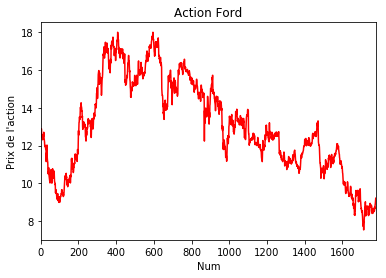

In [66]:
#### On trace le prix de l'action en fonction du temps

def graph(x,y,data):
    
    """
        Graphique une variable en fonction de l'autre
            Entrée: Nom colonne 1 (x), nom colonne 2 (y) et données (data)
            
            Sortie: Graphique
    """

    graph = data.plot("Num", "Open", legend = False, title = "Action Ford", color = (1,0,0));
    graph.legend = None
    graph.set_ylabel('Prix de l\'action')
    

graph("Num", "Open", ford)

Dans cette partie, on ne sélectionnera qu'un dixième et un vingtième des données:

**10 %** des données:

In [57]:
#### On ne sélectionne que 10% des données
un_dixieme = ford.sample(frac = .1, random_state = np.random.randint(10))

In [58]:
#### De la même façon avec 5% des données

un_vingtieme = ford.sample(frac = .05, random_state = np.random.randint(10))

In [59]:
un_dixieme.head()

,Open,High,Low,Close,Adj Close,Volume,Num
Date,,,,,,,
2015-11-11,14.28,14.38,14.18,14.31,11.834980,16893000,924
2017-08-16,10.86,10.90,10.78,10.80,9.721380,28316300,1367
2013-03-26,13.35,13.37,13.24,13.31,10.055574,24236700,260
2012-12-28,12.55,12.88,12.52,12.87,9.652084,95668600,201
2012-03-15,12.90,13.04,12.83,12.90,9.534516,55286600,3


PB: Valeur ne sont pas dans l'ordre

In [41]:
un_dixieme.head()

,Open,High,Low,Close,Adj Close,Volume,Num
Date,,,,,,,
2017-05-17,10.940000,10.95,10.67,10.76,9.562569,54670100,1304
2015-03-26,16.110001,16.17,15.96,16.01,12.853803,33327900,764
2016-02-08,11.390000,11.69,11.25,11.59,9.704153,45274500,983
2017-09-21,11.710000,11.82,11.69,11.72,10.549499,40319400,1392
2013-06-18,15.540000,15.71,15.44,15.65,11.910292,25950200,318


In [60]:
#### On enleve l'index de ce data frame

un_dixieme.index.name = None
un_dixieme.head()####Plus le nom de l'index Date

un_vingtieme.index.name = None

In [61]:
#### On tri les valeurs par Num

un_dixieme = un_dixieme.sort_values(by = ["Num"], ascending = [True])
un_dixieme[["Open", "Close", "Num"]]#### Double crôchet
un_vingtieme = un_vingtieme.sort_values(by = ["Num"], ascending = [True])

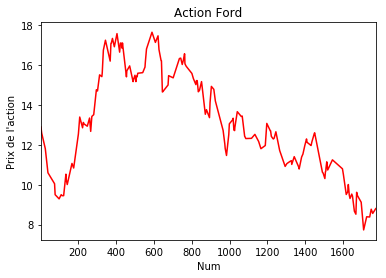

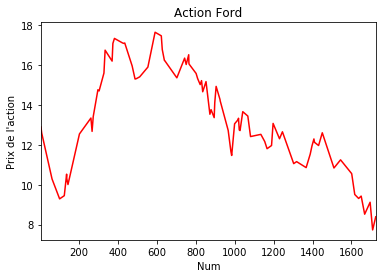

In [68]:
#### On trace le graphique original par rapport à l'echantillon de données

#### Un dixième
graph("Num", "Open", un_dixieme)

#### Un vingtième
graph("Num", "Open", un_vingtieme)


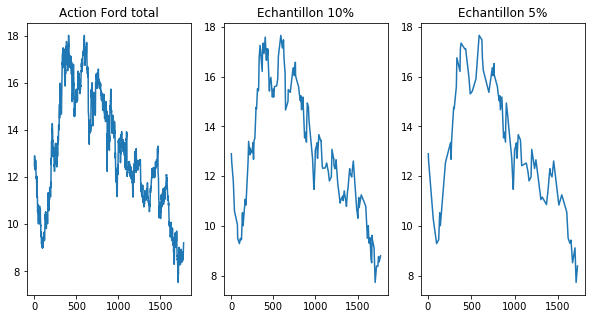

In [70]:
#### On affiche les deux graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes


def trois_graph(x, y):
    
    """
        Fonction qui retourne trois graphiques (Action ford, 10% des valeurs aléatoires et 5% des valeurs)
        
        Entrée: Nom de colonne x et y
        
        Sortie: Trois graphiques
    
    """
    #### Une ligne et trois tableaux 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    #### Affichage premier tableau 
    axes[0].plot(x, y, data = ford)
    axes[0].set_title("Action Ford total")
    
    #### Affichage second tableau 10%
    axes[1].plot(x, y, data = un_dixieme)
    axes[1].set_title("Echantillon 10%")
    
    #### Affichage troisième tableau 5%
    axes[2].plot(x, y, data = un_vingtieme)
    axes[2].set_title("Echantillon 5%")


trois_graph("Num", "Open" ) #### Appel de la fonction

In [71]:
#### Modification de l'index pour que ce soit la variable "Num"

ford = ford.reset_index()
ford.head(3)

# ford.index = ford["Num"]
# ford

,Date,Open,High,Low,Close,Adj Close,Volume,Num
0,2012-03-13,12.48,12.72,12.40,12.70,9.386694,42783600,1
1,2012-03-14,12.64,12.90,12.63,12.88,9.519732,47578500,2
2,2012-03-15,12.90,13.04,12.83,12.90,9.534516,55286600,3


On génère une moyenne mobile avec une fenètre de 80 cotations. On place les résultats dans la colonne "**Moyenne mobile**".

In [72]:
#### Moyenne mobile 

#### Moyenne mobile à fenètre de 80
ford["Moyenne_Mobile"] = ford["Open"].rolling(window =80).mean()

ford[["Open", "Moyenne_Mobile"]].tail(5) #### 5 dernières colonnes de notre dataset

#ford

,Open,Moyenne_Mobile
1772,8.80,8.564000
1773,8.86,8.553375
1774,8.95,8.545875
1775,9.07,8.545250
1776,9.21,8.547625


In [ ]:
On trace les 4 graphiques cote à cote.

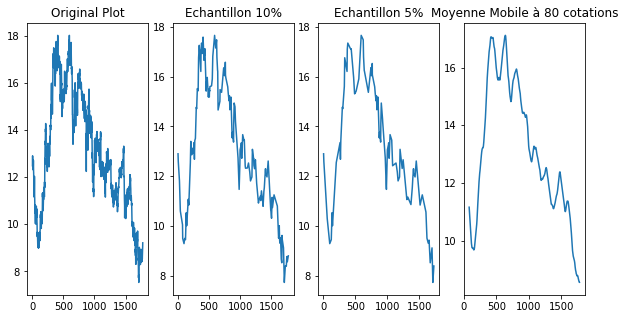

In [75]:
#### On affiche les 4 graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,5))

axes[0].plot("Num", "Open", data = ford)
axes[0].set_title("Original Plot")
axes[1].plot("Num", "Open", data = un_dixieme)
axes[1].set_title("Echantillon 10%")
axes[2].plot("Num", "Open", data = un_vingtieme)
axes[2].set_title("Echantillon 5%")
axes[3].plot("Num", "Moyenne_Mobile", data = ford)
axes[3].set_title("Moyenne Mobile à 80 cotations")

La moyenne mobile semble bien fitter les graphiques précedents. Qu'en est t-il si nous les superposons?

In [78]:
##### On affiche les données originale et les données lissée sur le même graphique


def sup_graph(x, y1, y2):
    """
        Entrée: Nombre de cotation(x), prix moyenne mobile (y1), prix high (y2)
        
        Sortie: Graphique
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111);
    #### Graphique 1: Moyenne mobile
    ax.plot(ford[x], ford[y1], color = (0,0,0), linewidth = 4, alpha =.9, label = "Lissé MM")
    
    #### Graphique 2: Plus haut de cotation
    ax.plot(ford[x], ford[y2], color = (1,0,0), label = "Original")

    ax.set_title('Les données originales et lissées')

    ax.set_xlabel('Num')
    ax.set_ylabel("Prix")
    ax.legend(loc = "lower right")

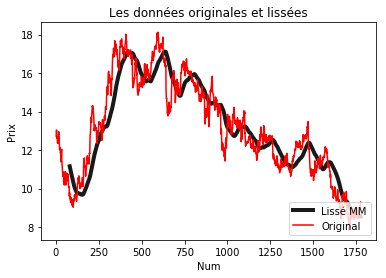

In [79]:
sup_graph("Num", "Moyenne_Mobile", "High")

Le même code mais avec les dates en abscisses:

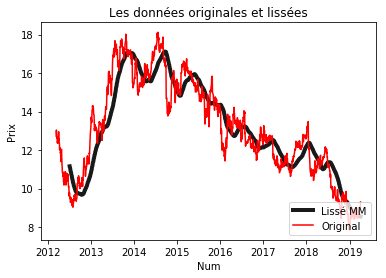

In [80]:
sup_graph("Date", "Moyenne_Mobile", "High")

On prendra ici les cotations entre 200 et 400.

In [90]:
#### Cotation entre 5000 et 10000

In [91]:
Num_ford = ford[(ford["Num"] >= 200) & (ford["Num"]<=400)]

In [94]:
Num_ford[:10]

,Date,Open,High,Low,Close,Adj Close,Volume,Num,Moyenne_Mobile
199,2012-12-27,12.79,12.81,12.36,12.76,9.569590,108315100,200,10.693125
200,2012-12-28,12.55,12.88,12.52,12.87,9.652084,95668600,201,10.732625
201,2012-12-31,12.88,13.08,12.76,12.95,9.712079,106908900,202,10.776500
202,2013-01-02,13.23,13.28,13.00,13.20,9.899574,75274700,203,10.823750
203,2013-01-03,13.24,13.70,13.05,13.46,10.094565,121284700,204,10.868500
204,2013-01-04,13.51,13.61,13.35,13.57,10.177060,54669900,205,10.913000
205,2013-01-07,13.52,13.58,13.35,13.43,10.072066,43482400,206,10.956000
206,2013-01-08,13.38,13.43,13.20,13.35,10.012066,46336200,207,10.996000
207,2013-01-09,13.40,13.60,13.39,13.47,10.102062,36973900,208,11.035375
208,2013-01-10,13.78,13.94,13.68,13.83,10.372054,84884300,209,11.080125


Dans cette partie, on cherchera à prédire notre moyenne mobile à l'aide d'une régression linéaire

In [97]:
#### Regression Linéaire

from sklearn.linear_model import LinearRegression

#### fit(X,y)

#### On cherche a predire une moyenne mobile

model = LinearRegression().fit(Num_ford[["Open"]], Num_ford[["Moyenne_Mobile"]])


m = model.coef_[0]
b = model.intercept_

#### Equation de la ligne

print("y=", round(m[0], 2), "x +", round(b[0],2)) ##### Equation de la droite

y= 0.86 x + 0.93


<math>
Y = X \beta + \epsilon
</math>

In [98]:
#### Prédiction de la moyenne mobile du cours d'ouverture

prediction = model.predict(Num_ford[["Moyenne_Mobile"]])
prediction[:10]

array([[10.11843796],
       [10.15236162],
       [10.19004265],
       [10.23062222],
       [10.26905471],
       [10.30727251],
       [10.34420206],
       [10.37855513],
       [10.41237144],
       [10.45080394]])

In [99]:
##### On crée un nouveau data frame avec les valeurs prédites
prediction = pd.DataFrame(data = prediction, index = Num_ford.index.values, columns = ["Pred"])

prediction.head(5)  #### Affichage des 5 valeurs

,Pred
199,10.118438
200,10.152362
201,10.190043
202,10.230622
203,10.269055


In [100]:
#### Jointure de la prediction avec l'ancienne table
jointure = Num_ford.join(prediction, how = "inner") 
jointure.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Num,Moyenne_Mobile,Pred
199,2012-12-27,12.79,12.81,12.36,12.76,9.569590,108315100,200,10.693125,10.118438
200,2012-12-28,12.55,12.88,12.52,12.87,9.652084,95668600,201,10.732625,10.152362
201,2012-12-31,12.88,13.08,12.76,12.95,9.712079,106908900,202,10.776500,10.190043
202,2013-01-02,13.23,13.28,13.00,13.20,9.899574,75274700,203,10.823750,10.230622
203,2013-01-03,13.24,13.70,13.05,13.46,10.094565,121284700,204,10.868500,10.269055


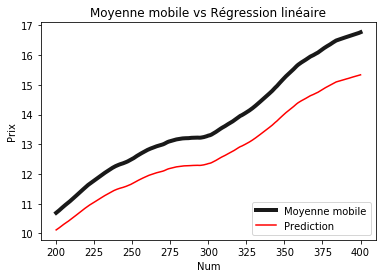

In [101]:
#### Affichage de la moyenne mobile et de la prédiction

fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [102]:
import sklearn

r_carre = sklearn.metrics.r2_score(jointure["Moyenne_Mobile"],jointure["Pred"], multioutput = "uniform_average")
r_carre

0.628477529609937

R_carre faible